Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

It is a classification problem where we have to predict whether a loan would be approved or not. In a classification problem, we have to predict discrete values based on a given set of independent variable(s). Classification can be of two types:

Binary Classification : In this classification we have to predict either of the two given classes. For example: classifying the gender as male or female, predicting the result as win or loss, etc.

Multiclass Classification : Here we have to classify the data into three or more classes. For example: classifying a movie's genre as comedy, action or romantic, classify fruits as oranges, apples, or pears, etc.

Loan prediction is a very common real-life problem that each retail bank faces atleast once in its lifetime. If done correctly, it can save a lot of man hours at the end of a retail bank.

Although this course is specifically built to give you a walkthrough of Loan Prediction problem, you can always refer the content to get a comprehensive overview to solve a classification problem.

What is hypothesis generation?

This is a very important stage in any data science/machine learning pipeline. It involves understanding the problem in detail by brainstorming as many factors as possible which can impact the outcome. It is done by understanding the problem statement thoroughly and before looking at the data.

Below are some of the factors which I think can affect the Loan Approval (dependent variable for this loan prediction problem):

- Salary: Applicants with high income should have more chances of loan approval.

- Previous history: Applicants who have repayed their previous debts should have higher chances of loan approval.

- Loan amount: Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.

- Loan term: Loan for less time period and less amount should have higher chances of approval.

- EMI: Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.

These are some of the factors which i think can affect the target variable, you can come up with many more factors.


Dataset -  https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
train=pd.read_csv("train_ctrUa4K.csv")
test=pd.read_csv("test_lAUu6dG.csv")

In [7]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [0]:
train_orginal=train.copy()
test_original=test.copy()

In [10]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [11]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [12]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [13]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [16]:
train.shape

(614, 13)

In [17]:
test.shape

(367, 12)

In [18]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [19]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

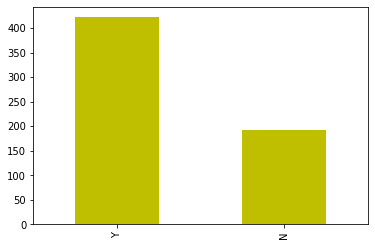

In [20]:
train['Loan_Status'].value_counts().plot.bar(color='y')

The loan of 422(around 69%) people out of 614 was approved.

Now lets visualize each variable separately. Different types of variables are Categorical, ordinal and numerical.

- Categorical features: These features have categories (Gender, Married, Self_Employed, Credit_History, Loan_Status)

- Ordinal features: Variables in categorical features having some order involved (Dependents, Education, Property_Area)

- Numerical features: These features have numerical values (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term)

Let’s visualize the categorical and ordinal features first.

**Independent Variable (Categorical)**

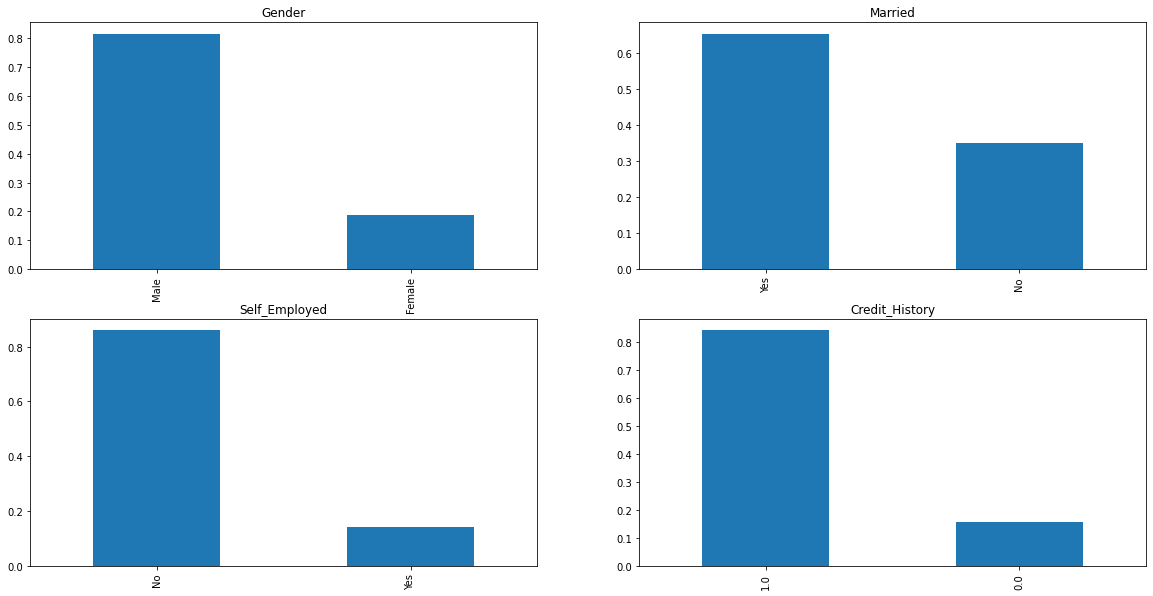

In [26]:
plt.figure(1) 

plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender') 

plt.subplot(222) 
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 

plt.subplot(223) 
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 

plt.subplot(224) 
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 

plt.show()

It can be inferred from the above bar plots that:

- 80% applicants in the dataset are male.
- Around 65% of the applicants in the dataset are married.
- Around 15% applicants in the dataset are self employed.
- Around 85% applicants have repaid their debts.

**Independent Variable (Ordinal)**

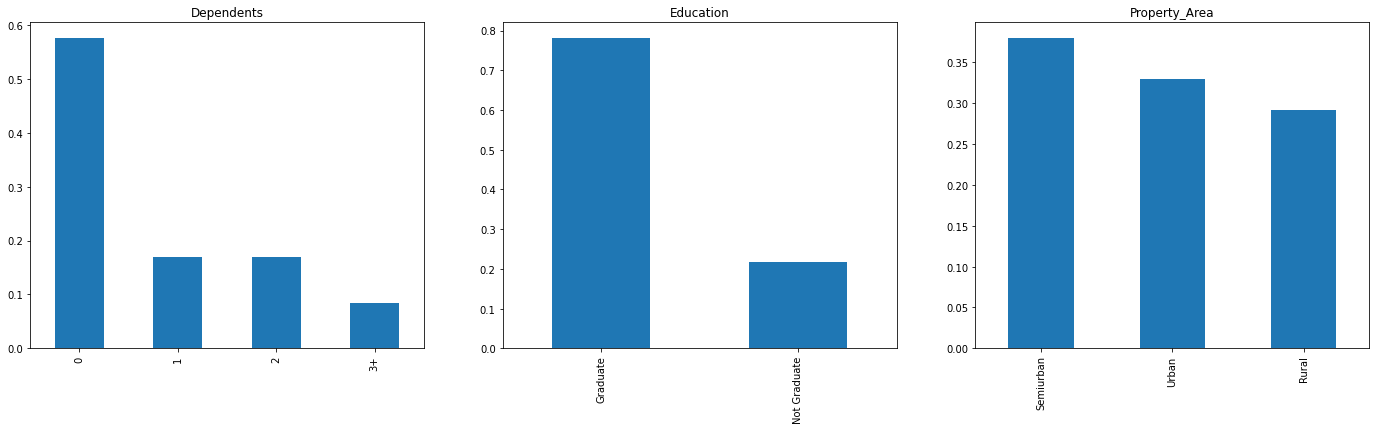

In [29]:
plt.figure(1) 

plt.subplot(131) 
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents') 

plt.subplot(132) 
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 

plt.subplot(133) 
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area') 

plt.show()

Following inferences can be made from the above bar plots:

- Most of the applicants don’t have any dependents.
- Around 80% of the applicants are Graduate.
- Most of the applicants are from Semiurban area.

**Independent Variable (Numerical)**

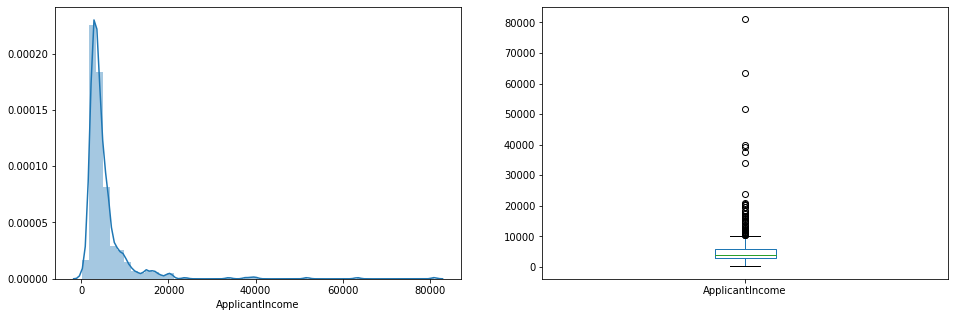

In [30]:
plt.figure(1) 

plt.subplot(121) 
sns.distplot(train['ApplicantIncome']); 

plt.subplot(122) 
train['ApplicantIncome'].plot.box(figsize=(16,5)) 

plt.show()

It can be inferred that most of the data in the distribution of applicant income is towards left which means it is not normally distributed. We will try to make it normal in later sections as algorithms works better if the data is normally distributed.

The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels. Let us segregate them by Education:

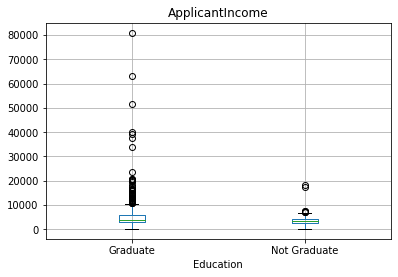

In [32]:
train.boxplot(column='ApplicantIncome', by = 'Education') 
plt.suptitle("")
plt.show()

We can see that there are a higher number of graduates with very high incomes, which are appearing to be the outliers.


Let’s look at the Coapplicant income distribution.

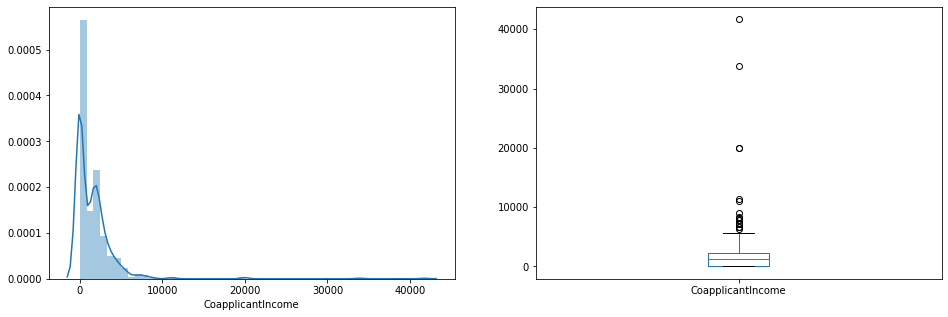

In [33]:
plt.figure(1) 

plt.subplot(121) 
sns.distplot(train['CoapplicantIncome']); 

plt.subplot(122) 
train['CoapplicantIncome'].plot.box(figsize=(16,5)) 

plt.show()

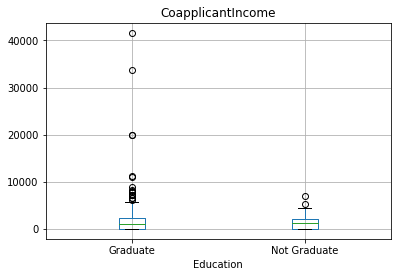

In [34]:
train.boxplot(column='CoapplicantIncome', by = 'Education') 
plt.suptitle("")
plt.show()

We see a similar distribution as that of the applicant income. Majority of coapplicant’s income ranges from 0 to 5000. We also see a lot of outliers in the coapplicant income and it is not normally distributed.

Let’s look at the distribution of LoanAmount variable.

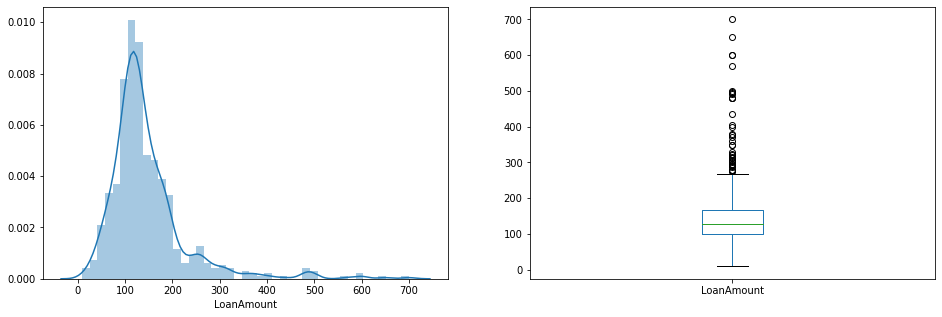

In [35]:
plt.figure(1) 

plt.subplot(121) 
df=train.dropna() 
sns.distplot(train['LoanAmount']); 

plt.subplot(122) 
train['LoanAmount'].plot.box(figsize=(16,5)) 

plt.show()

We see a lot of outliers in this variable and the distribution is fairly normal. We will treat the outliers in later sections.

Now we would like to know how well each feature correlate with Loan Status. So, in the next section we will look at bivariate analysis.

Lets recall some of the hypotheses that we generated earlier:

- Applicants with high income should have more chances of loan approval.
- Applicants who have repaid their previous debts should have higher chances of loan approval.
- Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.
- Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.

**Categorical Independent Variable vs Target Variable**

In [36]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status']) 
Gender

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


In [40]:
Gender.div(Gender.sum(1).astype(float), axis=0)
#37/(37+75)  = 0.330357
#75/(37+75)  = 0.669643

#......

Loan_Status,N,Y
Gender,,
Female,0.330357,0.669643
Male,0.306748,0.693252


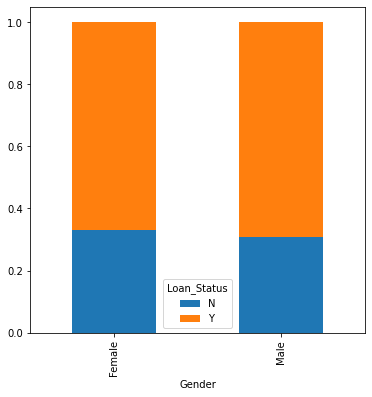

In [41]:
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))

It can be inferred that the proportion of male and female applicants is more or less same for both approved and unapproved loans.

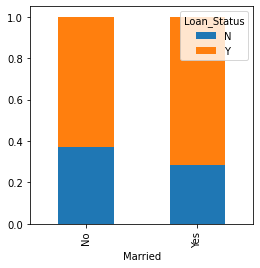

In [42]:
Married=pd.crosstab(train['Married'],train['Loan_Status']) 
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 

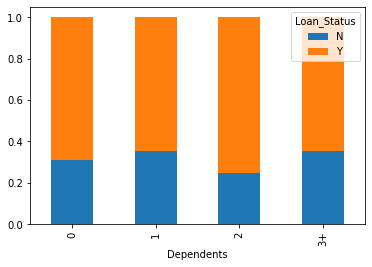

In [43]:
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show() 

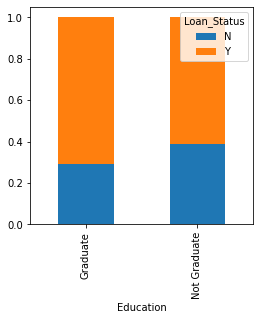

In [44]:
Education=pd.crosstab(train['Education'],train['Loan_Status']) 
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 

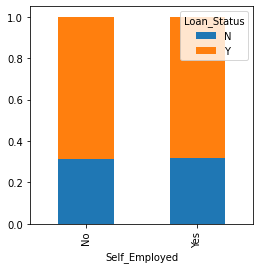

In [46]:
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status']) 
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show()

- Proportion of married applicants is higher for the approved loans.
- Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.
- There is nothing significant we can infer from Self_Employed vs Loan_Status plot.

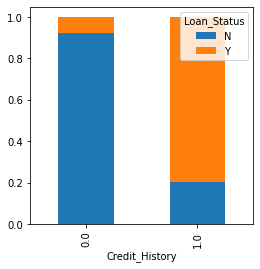

In [47]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status']) 
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 

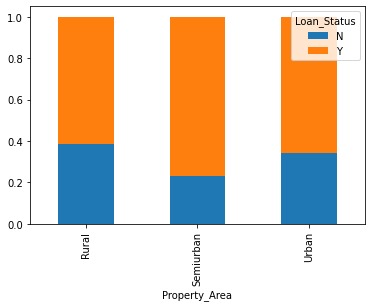

In [49]:
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status']) 
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show()

- It seems people with credit history as 1 are more likely to get their loans approved.
- Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

**Numerical Independent Variable vs Target Variable**

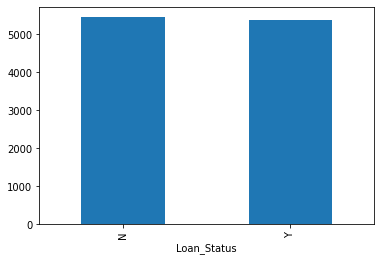

In [50]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

Here the y-axis represents the mean applicant income. We don’t see any change in the mean income. So, let’s make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.

In [52]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high'] 

train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)
pd.DataFrame(train['Income_bin'])

,Income_bin
0,High
1,High
2,Average
3,Average
4,High
...,...
609,Average
610,High
611,Very high
612,Very high


In [53]:
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status']) 
Income_bin

Loan_Status,N,Y
Income_bin,,
Low,34,74
Average,67,159
High,45,98
Very high,46,91


Text(0, 0.5, 'Percentage')

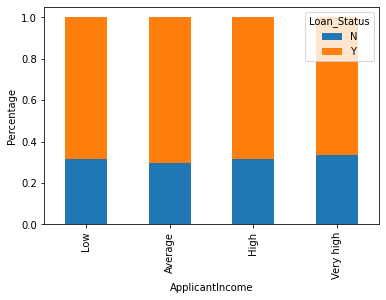

In [54]:
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('ApplicantIncome') 
plt.ylabel('Percentage')

It can be inferred that Applicant income does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if the applicant income is high the chances of loan approval will also be high.

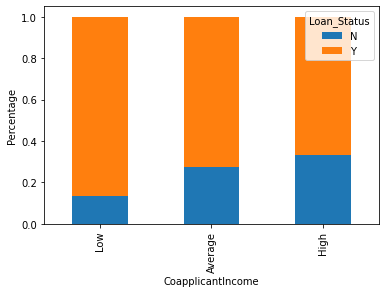

In [55]:
bins=[0,1000,3000,42000] 
group=['Low','Average','High'] 

train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status']) 
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('CoapplicantIncome') 
P = plt.ylabel('Percentage')

It shows that if coapplicant’s income is less the chances of loan approval are high. 

But this does not look right. 

The possible reason behind this may be that most of the applicants don’t have any coapplicant so the coapplicant income for such applicants is 0 and hence the loan approval is not dependent on it. 

So we can make a new variable in which we will combine the applicant’s and coapplicant’s income to visualize the combined effect of income on loan approval.

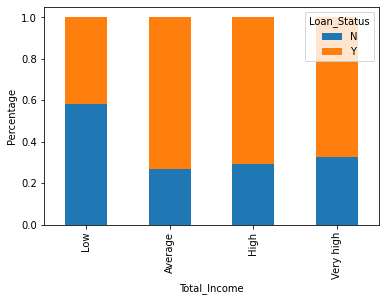

In [57]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']

bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']

train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)

Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 

plt.xlabel('Total_Income')
P = plt.ylabel('Percentage')

We can see that Proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average, High and Very High Income.

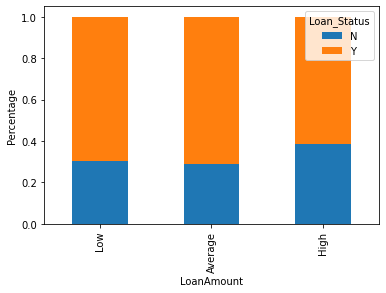

In [58]:
bins=[0,100,200,700]
group=['Low','Average','High'] 

train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)

LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status']) 
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('LoanAmount')

P = plt.ylabel('Percentage')

It can be seen that the proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount which supports our hypothesis in which we considered that the chances of loan approval will be high when the loan amount is less.

Let’s drop the bins which we created for the exploration part

We will change the 3+ in dependents variable to 3 to make it a numerical variable


We will also convert the target variable’s categories into 0 and 1 so that we can find its correlation with numerical variables.

One more reason to do so is few models like logistic regression takes only numeric values as input. We will replace N with 0 and Y with 1.

In [0]:
train=train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

train['Dependents'].replace('3+', 3,inplace=True)
test['Dependents'].replace('3+', 3,inplace=True) 

train['Loan_Status'].replace('N', 0,inplace=True) 
train['Loan_Status'].replace('Y', 1,inplace=True)

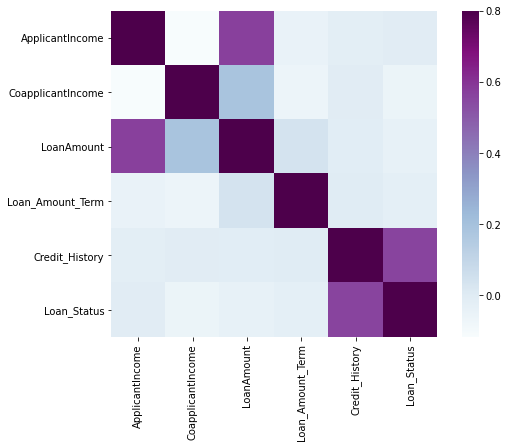

In [60]:
matrix = train.corr()

f, ax = plt.subplots(figsize=(9, 6))

sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

We see that the most correlated variables are (ApplicantIncome - LoanAmount) and (Credit_History - Loan_Status). LoanAmount is also correlated with CoapplicantIncome.

**Missing value imputation**

In [61]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History features.

**For numerical variable**s: imputation using mean or median

**For categorical variables**: imputation using mode

In [0]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 
train['Married'].fillna(train['Married'].mode()[0], inplace=True) 
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [63]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [0]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [0]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [66]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [0]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True) 
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True) 
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

**Outlier Treatment**

In [0]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])

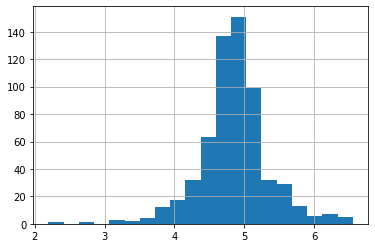

In [69]:
train['LoanAmount_log'].hist(bins=20) 

In [0]:
test['LoanAmount_log'] = np.log(test['LoanAmount'])

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided. Let’s build a logistic regression model and make predictions for the test dataset.

**Modelling**

**Logistic Regression**

In [0]:
train=train.drop('Loan_ID',axis=1) 
test=test.drop('Loan_ID',axis=1)

In [0]:
X = train.drop('Loan_Status',1) 
y = train.Loan_Status

In [74]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,4.852030
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,4.852030
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,4.189655
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,4.787492
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,4.948760


In [75]:
X=pd.get_dummies(X) 
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,4.852030,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,4.852030,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,4.189655,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,4.787492,0,1,0,1,0,1,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,4.948760,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1


In [0]:
train=pd.get_dummies(train) 
test=pd.get_dummies(test)

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

In [0]:
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

In [0]:
model = LogisticRegression() 

In [80]:
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
pred_cv = model.predict(x_cv)

In [82]:
accuracy_score(y_cv,pred_cv)

0.8054054054054054

In [0]:
pred_test = model.predict(test)

In [86]:
submission=pd.DataFrame()
submission['Loan_ID']=test_original['Loan_ID']
submission['Loan_Status']=pred_test 
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)
submission

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [0]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')

**Logistic Regression with StratifiedKFold**

In [0]:
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics


1 of kfold 5
Model - 
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
accuracy_score 0.8048780487804879


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


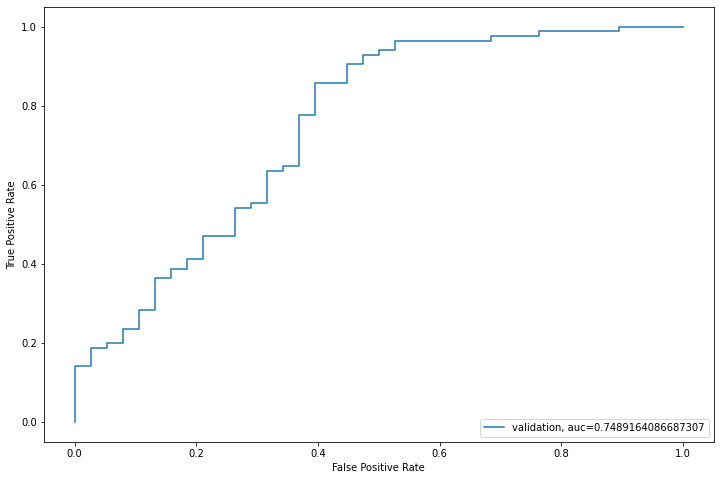


2 of kfold 5
Model - 
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
accuracy_score 0.8373983739837398


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


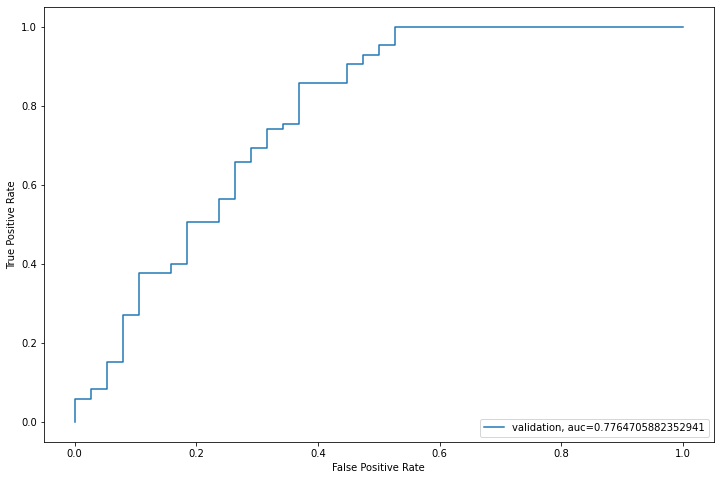


3 of kfold 5
Model - 
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
accuracy_score 0.7804878048780488


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


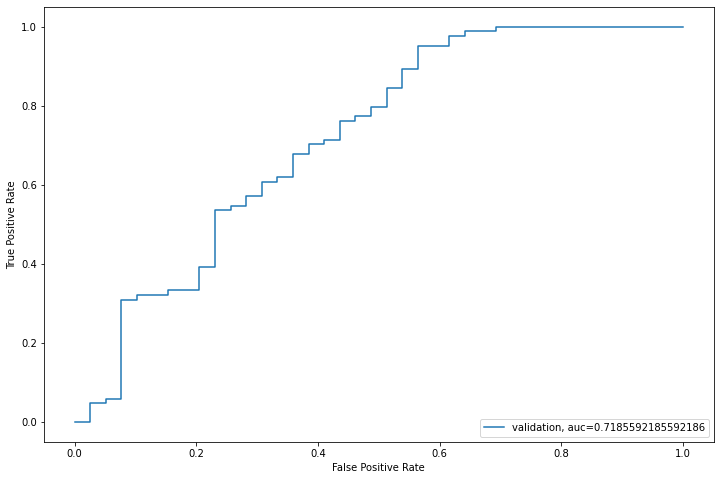


4 of kfold 5
Model - 
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
accuracy_score 0.7886178861788617


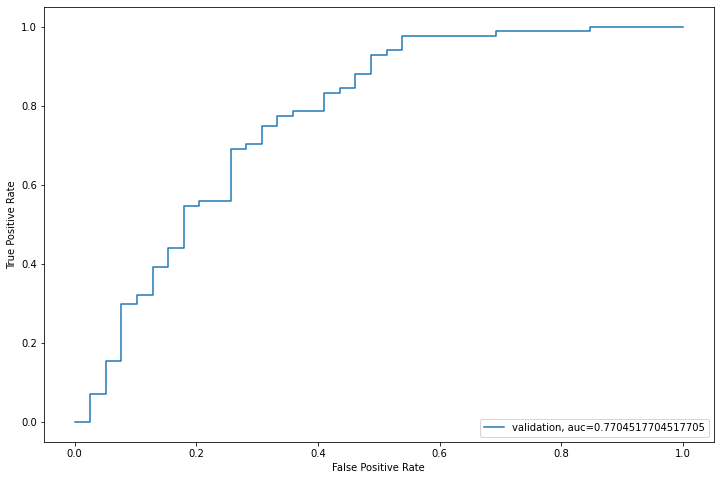


5 of kfold 5
Model - 
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
accuracy_score 0.7950819672131147


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


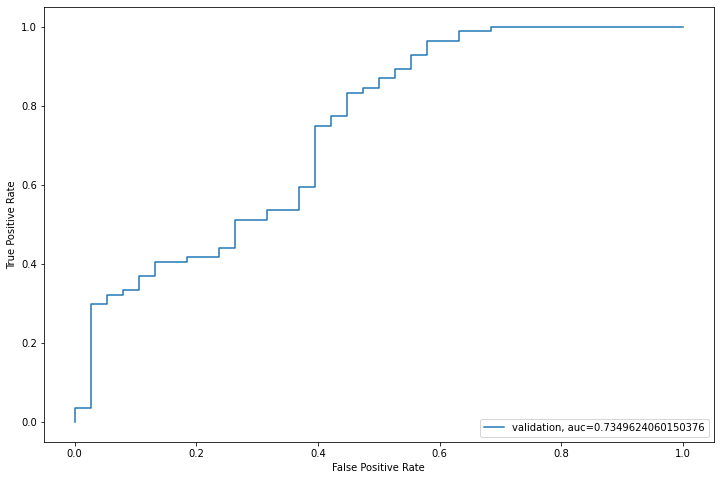

In [94]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)

for train_index,test_index in kf.split(X,y):
  print('\n{} of kfold {}'.format(i,kf.n_splits))
  xtr,xvl = X.loc[train_index],X.loc[test_index]
  ytr,yvl = y[train_index],y[test_index] 

  model = LogisticRegression(random_state=1)
  model.fit(xtr, ytr)

  print("Model - \n", model)

  pred_test = model.predict(xvl)
  score = accuracy_score(yvl,pred_test)
  print('accuracy_score',score)
  i=i+1
  pred_test = model.predict(test)
  pred_proba=model.predict_proba(xvl)[:,1]

  fpr, tpr, _ = metrics.roc_curve(yvl,  pred_proba)
  auc = metrics.roc_auc_score(yvl, pred_proba)
  plt.figure(figsize=(12,8))
  plt.plot(fpr,tpr,label="validation, auc="+str(auc))
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend(loc=4)
  plt.show()

In [95]:
submission=pd.DataFrame()
submission['Loan_ID']=test_original['Loan_ID']
submission['Loan_Status']=pred_test 
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)
submission

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [0]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic_strat.csv')

**Feature Engineering**

In [0]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome'] 
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

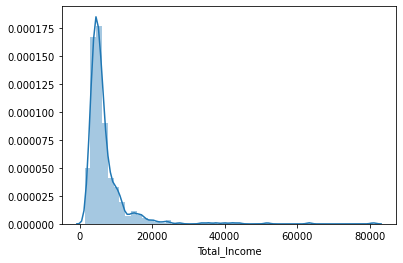

In [98]:
sns.distplot(train['Total_Income']);

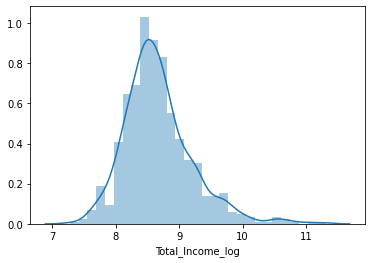

In [99]:
train['Total_Income_log'] = np.log(train['Total_Income']) 
sns.distplot(train['Total_Income_log']); 

In [0]:
test['Total_Income_log'] = np.log(test['Total_Income'])

In [0]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term'] 
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']

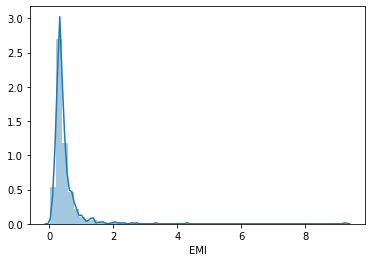

In [102]:
sns.distplot(train['EMI']);

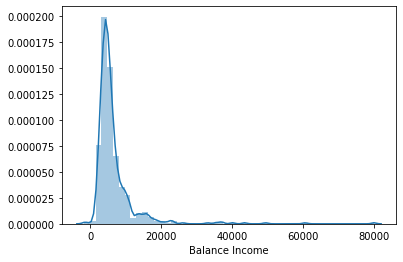

In [103]:
train['Balance Income']=train['Total_Income']-(train['EMI']*1000) # Multiply with 1000 to make the units equal
test['Balance Income']=test['Total_Income']-(test['EMI']*1000)

sns.distplot(train['Balance Income']);

In [0]:
train=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1) 
test=test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

In [105]:
train.columns

Index(['Credit_History', 'Loan_Status', 'LoanAmount_log', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_3',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Total_Income', 'Total_Income_log', 'EMI', 'Balance Income'],
      dtype='object')

In [106]:
test.columns

Index(['Credit_History', 'LoanAmount_log', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_3', 'Dependents_0',
       'Dependents_1', 'Dependents_2', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Total_Income', 'Total_Income_log', 'EMI', 'Balance Income'],
      dtype='object')

In [0]:
X = train.drop('Loan_Status',1)
y = train.Loan_Status

In [110]:
train.shape

(614, 22)

In [111]:
test.shape

(367, 21)

In [113]:
#Logistic Regression

i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):
  print('\n{} of kfold {}'.format(i,kf.n_splits))   
  xtr,xvl = X.loc[train_index],X.loc[test_index] 
  ytr,yvl = y[train_index],y[test_index] 

  model = LogisticRegression(random_state=1)
  model.fit(xtr, ytr)
  pred_test = model.predict(xvl) 
  score = accuracy_score(yvl,pred_test)
  print('accuracy_score',score) 
  i=i+1
  pred_test = model.predict(test) 
  pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.7886178861788617

2 of kfold 5
accuracy_score 0.6910569105691057

3 of kfold 5
accuracy_score 0.6666666666666666

4 of kfold 5
accuracy_score 0.7967479674796748

5 of kfold 5
accuracy_score 0.680327868852459


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [114]:
#Decision Tree
from sklearn import tree

i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):
  print('\n{} of kfold {}'.format(i,kf.n_splits))   
  xtr,xvl = X.loc[train_index],X.loc[test_index] 
  ytr,yvl = y[train_index],y[test_index] 

  model = tree.DecisionTreeClassifier(random_state=1)
  model.fit(xtr, ytr)
  pred_test = model.predict(xvl) 
  score = accuracy_score(yvl,pred_test)
  print('accuracy_score',score) 
  i=i+1
  pred_test = model.predict(test) 
  pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.7398373983739838

2 of kfold 5
accuracy_score 0.6991869918699187

3 of kfold 5
accuracy_score 0.7560975609756098

4 of kfold 5
accuracy_score 0.7073170731707317

5 of kfold 5
accuracy_score 0.6721311475409836


In [115]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):
  print('\n{} of kfold {}'.format(i,kf.n_splits))   
  xtr,xvl = X.loc[train_index],X.loc[test_index] 
  ytr,yvl = y[train_index],y[test_index] 

  model = RandomForestClassifier(random_state=1, max_depth=10)
  model.fit(xtr, ytr)
  pred_test = model.predict(xvl) 
  score = accuracy_score(yvl,pred_test)
  print('accuracy_score',score) 
  i=i+1
  pred_test = model.predict(test) 
  pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.8292682926829268

2 of kfold 5
accuracy_score 0.8130081300813008

3 of kfold 5
accuracy_score 0.7723577235772358

4 of kfold 5
accuracy_score 0.8048780487804879

5 of kfold 5
accuracy_score 0.7540983606557377


In [116]:
from sklearn.model_selection import GridSearchCV

paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}

grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3, random_state=1)

grid_search.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                                

In [117]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=41,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [118]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):
  print('\n{} of kfold {}'.format(i,kf.n_splits))   
  xtr,xvl = X.loc[train_index],X.loc[test_index] 
  ytr,yvl = y[train_index],y[test_index] 

  model = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=41,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)
  model.fit(xtr, ytr)
  pred_test = model.predict(xvl) 
  score = accuracy_score(yvl,pred_test)
  print('accuracy_score',score) 
  i=i+1
  pred_test = model.predict(test) 
  pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.8211382113821138

2 of kfold 5
accuracy_score 0.8373983739837398

3 of kfold 5
accuracy_score 0.7804878048780488

4 of kfold 5
accuracy_score 0.7804878048780488

5 of kfold 5
accuracy_score 0.7868852459016393


In [121]:
importances=pd.Series(model.feature_importances_, index=X.columns) 
importances

Credit_History             0.394134
LoanAmount_log             0.064901
Gender_Female              0.003064
Gender_Male                0.007016
Married_No                 0.013283
Married_Yes                0.017181
Dependents_3               0.006613
Dependents_0               0.008688
Dependents_1               0.007043
Dependents_2               0.010407
Education_Graduate         0.005080
Education_Not Graduate     0.016020
Self_Employed_No           0.006635
Self_Employed_Yes          0.007162
Property_Area_Rural        0.028533
Property_Area_Semiurban    0.029685
Property_Area_Urban        0.006872
Total_Income               0.092717
Total_Income_log           0.071178
EMI                        0.078217
Balance Income             0.125571
dtype: float64

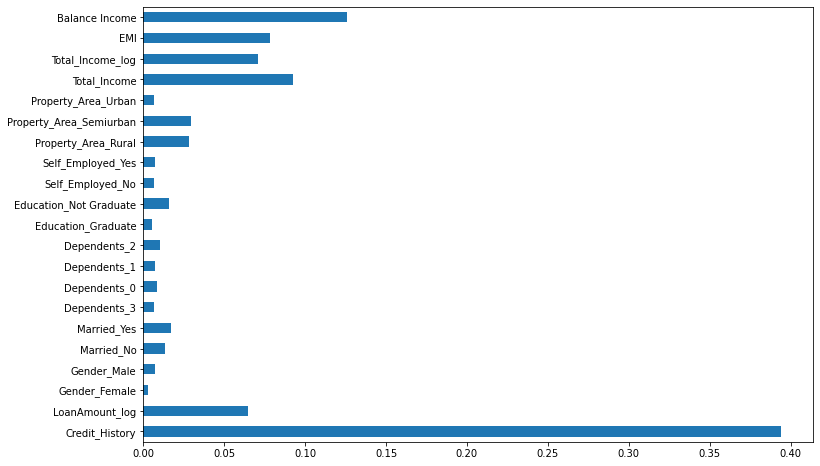

In [122]:
importances.plot(kind='barh', figsize=(12,8))

**XGBoost** works only with numeric variables and we have already replaced the categorical variables with numeric variables. 

Let’s have a look at the parameters that we are going to use in our model.

- n_estimator: This specifies the number of trees for the model.
- max_depth: We can specify maximum depth of a tree using this parameter.

In [123]:
from xgboost import XGBClassifier

i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):
  print('\n{} of kfold {}'.format(i,kf.n_splits))   
  xtr,xvl = X.loc[train_index],X.loc[test_index] 
  ytr,yvl = y[train_index],y[test_index] 

  model = XGBClassifier(n_estimators=50, max_depth=4)
  model.fit(xtr, ytr)
  pred_test = model.predict(xvl) 
  score = accuracy_score(yvl,pred_test)
  print('accuracy_score',score) 
  i=i+1
  pred_test = model.predict(test) 
  pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.7886178861788617

2 of kfold 5
accuracy_score 0.8292682926829268

3 of kfold 5
accuracy_score 0.7804878048780488

4 of kfold 5
accuracy_score 0.8048780487804879

5 of kfold 5
accuracy_score 0.7786885245901639
